Instanciando la red pre-entrenada VGG16 para la misma BD de perros y gatos reducida (5000 imágenes)pero con expansión de datos 

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Accediendo a la BD de perros y gatos

In [4]:
!pip install gdown #Instala una librería para descargar archivos de Google Drive
!gdown --id 1YeHqH7Gbypust6sZT2ehl8CUE9ELHQYC #Descarga el dataset que está en el Drive del Prof. Pereira
!unzip cats_vs_dogs_small.zip #Descomprime el archivo del dataset
from IPython.display import Image #Librería para visualizar imágenes en Jupyter
Image(filename='cats_vs_dogs_small/validation/cat/1488.jpg') #Visualiza el gato 1488
!cp cats_vs_dogs_small/train/Cat/665.jpg cats_vs_dogs_small/train/Cat/666.jpg
!cp cats_vs_dogs_small/train/Cat/834.jpg cats_vs_dogs_small/train/Cat/835.jpg

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: cats_vs_dogs_small/test/cat/1507.jpg  
  inflating: cats_vs_dogs_small/test/cat/1508.jpg  
  inflating: cats_vs_dogs_small/test/cat/1509.jpg  
  inflating: cats_vs_dogs_small/test/cat/1510.jpg  
  inflating: cats_vs_dogs_small/test/cat/1511.jpg  
  inflating: cats_vs_dogs_small/test/cat/1512.jpg  
  inflating: cats_vs_dogs_small/test/cat/1513.jpg  
  inflating: cats_vs_dogs_small/test/cat/1514.jpg  
  inflating: cats_vs_dogs_small/test/cat/1515.jpg  
  inflating: cats_vs_dogs_small/test/cat/1516.jpg  
  inflating: cats_vs_dogs_small/test/cat/1517.jpg  
  inflating: cats_vs_dogs_small/test/cat/1518.jpg  
  inflating: cats_vs_dogs_small/test/cat/1519.jpg  
  inflating: cats_vs_dogs_small/test/cat/1520.jpg  
  inflating: cats_vs_dogs_small/test/cat/1521.jpg  
  inflating: cats_vs_dogs_small/test/cat/1522.jpg  
  inflating: cats_vs_dogs_small/test/cat/1523.jpg  
  inflating: cats_vs_dogs_small/test/cat/1524.jpg  
  i

In [5]:
new_base_dir=r"cats_vs_dogs_small"

In [6]:
"""
import os, shutil
def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        dir = new_base_dir+"/"+subset_name+"/"+category
        fnames = [f"{original_dir}/{category}/{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            print(fname)
            print(dir)
            shutil.copy(fname,dir)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)
"""

'\nimport os, shutil\ndef make_subset(subset_name, start_index, end_index):\n    for category in ("Cat", "Dog"):\n        dir = new_base_dir+"/"+subset_name+"/"+category\n        fnames = [f"{original_dir}/{category}/{i}.jpg" for i in range(start_index, end_index)]\n        for fname in fnames:\n            print(fname)\n            print(dir)\n            shutil.copy(fname,dir)\n\nmake_subset("train", start_index=0, end_index=1000)\nmake_subset("validation", start_index=1000, end_index=1500)\nmake_subset("test", start_index=1500, end_index=2500)\n'

Ajustando los datos de la BD de perros y gatos

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Muestra la lista de pesos antes y despues del hacer estática VGG

In [8]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


Expansión de las imágenes, definición de la arquitectura y establecimiento de los hiperparámetros de entrenamiento 

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Entrenando ...

In [10]:
history = model.fit(
    train_dataset,
    epochs=50, #100
    validation_data=validation_dataset)

Epoch 1/50
63/63 [==============================] - 29s 205ms/step - loss: 20.6260 - accuracy: 0.8950 - val_loss: 5.1701 - val_accuracy: 0.9650
Epoch 2/50
63/63 [==============================] - 11s 175ms/step - loss: 6.3816 - accuracy: 0.9560 - val_loss: 4.4117 - val_accuracy: 0.9680
Epoch 3/50
63/63 [==============================] - 11s 177ms/step - loss: 5.9822 - accuracy: 0.9555 - val_loss: 4.1693 - val_accuracy: 0.9740
Epoch 4/50
63/63 [==============================] - 12s 180ms/step - loss: 5.1957 - accuracy: 0.9580 - val_loss: 4.2820 - val_accuracy: 0.9780
Epoch 5/50
63/63 [==============================] - 12s 185ms/step - loss: 3.8694 - accuracy: 0.9665 - val_loss: 5.2648 - val_accuracy: 0.9730
Epoch 6/50
63/63 [==============================] - 12s 187ms/step - loss: 4.2373 - accuracy: 0.9640 - val_loss: 5.7449 - val_accuracy: 0.9700
Epoch 7/50
63/63 [==============================] - 12s 185ms/step - loss: 5.6506 - accuracy: 0.9615 - val_loss: 3.9209 - val_accuracy: 0.978

Evaluación del modelo con la pérdida y el accuracy durante el entrenamiento

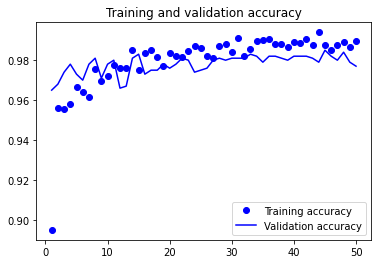

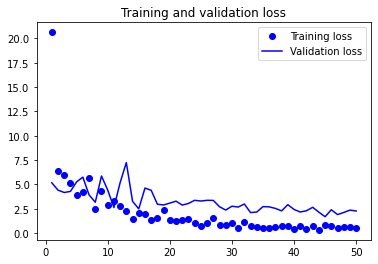

In [11]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()